# ASTR597B, Winter 2016: Big Data; HW2
### Andrew Lincowski


* Write a query (either SQL or for LSD) to select stars satisfying the $g-r < 0.4$ color selection criterion (see Section 2 of Belokurov et al. 2006). You're free to either run this query against the [CasJobs SDSS database](http://skyserver.sdss.org/casjobs/), or the LSD copy of the database.

I query CasJobs as follows. I note that this method required only one query to CasJobs and was about 80 mb.

```SQL

SELECT ra, dec, dered_g, dered_r
INTO mydb.streams
FROM Star
WHERE ((dered_g - dered_r) < 0.4) AND (-5 <= dec) AND (dec < 60) AND 
(r <= 22) AND (r > 20) AND (ra <= 230) AND (ra >= 110)
```

In [213]:
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
from astropy.table import Table
import pandas as pd
import sqlite3

In [214]:
streamfit = Table.read('streams.fit')

In [215]:
con = sqlite3.connect("hw2.db") #initiate db connection
df = streamfit.to_pandas() #Convert py table to pandas
df.to_sql('streamdb1', con) #send pandas data into db
#con.close() #And then close the connection...?

In [216]:
streamdata = pd.read_sql("""
    SELECT
        *
    FROM 
        streamdb1
""", con)

* Write Python code to divide the stars into the three r-band magnitude bins (see the paper and/or the figure caption for magnitude bin specification), and bin them into 0.5 deg x 0.5 deg pixels. You may find [numpy.histogram2d](http://docs.scipy.org/doc/numpy/reference/generated/numpy.histogram2d.html) helpful.

The bins are: 

blue: 20.0 $\lt$  r $\le$ 20.66 <br>
green: 20.66 $\lt$ r $\le$  21.33 <br>
red: 21.33 $\lt$ r $\le$  22.0


In [217]:
bluestream = streamdata[(streamdata.dered_r <= 20.66) & (streamdata.dered_r > 20.0)]
greenstream = streamdata[(streamdata.dered_r <= 21.33) & (streamdata.dered_r > 20.66)]
redstream = streamdata[(streamdata.dered_r <= 22.0) & (streamdata.dered_r > 21.33)]

In [223]:
blue_hist = np.histogram2d(bluestream.dec, bluestream.ra, bins=[130,240])
green_hist = np.histogram2d(greenstream.dec, greenstream.ra, bins=[130,240])
red_hist = np.histogram2d(redstream.dec, redstream.ra, bins=[130,240])

* Use [matplotlib.imshow](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.imshow) (or any other *Python* library of your choice) to create an RGB color composite equivalent of Figure 1. from the paper (see the figure caption for details)

Using imshow, I must have an array consisting of ra,dec,colordensity data, where colors are RGB values, so I will have to retrieve these separately using the histogram2D function

In [224]:
redh = (red_hist[0][:]).T
grnh = (green_hist[0][:]).T
bluh = (blue_hist[0][:]).T

rgbstreams = np.array([redh,grnh,bluh])
rgbstreams.T.shape
rgbstreams.max()

866.0

In [225]:
rgbstreams = np.array(rgbstreams)
rgbstreams = rgbstreams/rgbstreams.max() #normalize to 1

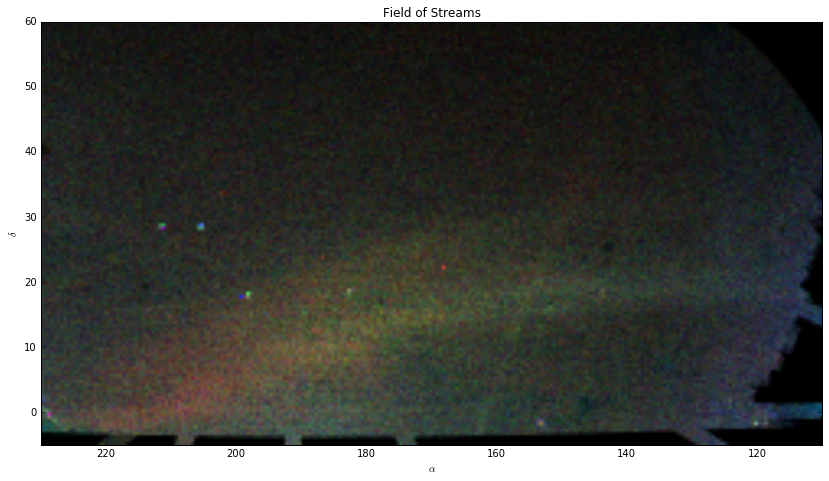

In [230]:
fig, ax = plt.subplots(figsize=(14,8))

ax.imshow((rgbstreams.T)*5.,origin='lower',extent=[110,230,-5,60])
plt.gca().invert_xaxis()
#ax.set_xlim(230, 110)
#ax.set_ylim(-5., 60.)

ax.set_xlabel(r"$\alpha$")
ax.set_ylabel("$\delta$")
ax.set_title("Field of Streams")

#ax.set_axis_bgcolor('black')